<a href="https://colab.research.google.com/github/aysutnyva/Machine_Learning/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!kaggle datasets download -d aadeshkoirala/mnist-784

Dataset URL: https://www.kaggle.com/datasets/aadeshkoirala/mnist-784
License(s): unknown
 92% 14.0M/15.2M [00:00<00:00, 73.7MB/s]
100% 15.2M/15.2M [00:00<00:00, 71.1MB/s]


In [ ]:
!unzip /content/mnist-784.zip

Archive:  /content/mnist-784.zip
  inflating: mnist_784.csv           


In [ ]:
mnist = pd.read_csv('/content/mnist-784.zip')

In [ ]:
mnist.shape

(70000, 785)

In [ ]:
mnist

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
X, y = mnist.drop(['class'], axis=1), mnist['class'].copy()

In [ ]:
X = X.to_numpy()
y = y.to_numpy()

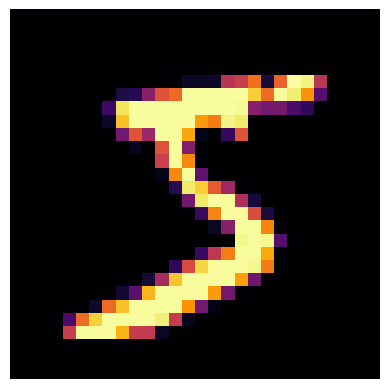

In [ ]:
import matplotlib.pyplot as plt

def digit_image(num_image):
  num_image_reshaped = num_image.reshape(28,28)
  plt.imshow(num_image_reshaped, cmap = 'inferno')
  plt.axis('off')

some_digit = X[0]
digit_image(some_digit)

In [ ]:
y[0]

5

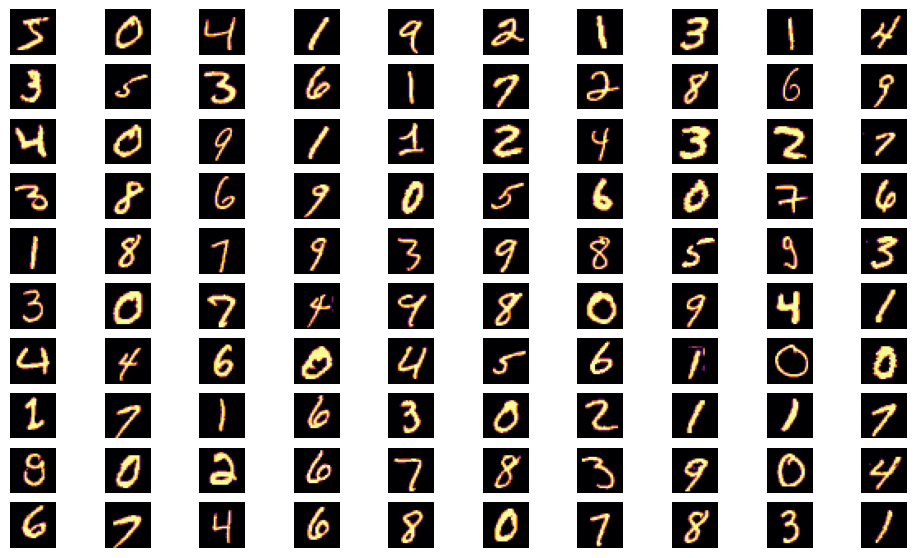

In [ ]:
plt.figure(figsize= (12,7))
for idx, image in enumerate(X[:100]):
  plt.subplot(10,10, idx +1)
  digit_image(image)

In [ ]:
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

In [ ]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

A good place to start is with a
stochastic gradient descent (SGD, or stochastic GD) classifier, using ScikitLearn’s SGDClassifier class. This classifier is capable of handling very
large datasets efficiently. This is in part because SGD deals with training
instances independently, one at a time, which also makes SGD well suited
for online learning.

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
sgd_clf = SGDClassifier(random_state=42)

In [ ]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

cross_val_score() performs K-fold cross-validation to evaluate models reliably.
It splits data multiple times, trains the model, and averages the performance.
Helps prevent overfitting and gives a more accurate estimate of model performance.

In [ ]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3)

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
sgd_clf.score(X_test, y_test_5)

0.9492

In [ ]:
sgd_clf.predict([some_digit])

array([ True])

In [ ]:
from sklearn.dummy import DummyClassifier

If a real model performs worse than DummyClassifier, something is wrong.

In [ ]:
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [ ]:
dummy_clf.score(X_train, y_train_5)

0.90965

In [ ]:
len(y_train), sum(y_train_5)

(60000, 5421)

In [ ]:
pd.DataFrame(y_train_5).value_counts()

,count
0,
False,54579
True,5421


In [ ]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3)

array([0.90965, 0.90965, 0.90965])

In [ ]:
from sklearn.model_selection import cross_val_predict

preds = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
preds

array([ True, False, False, ...,  True, False, False])

### **Presicion, recall, f1**

In [ ]:
#presicion- modelin dogru tapdiqlarinin hamisi dogrudur,
#recall- umumi dogru tapdiqlarinin necesi dogru olanlari tapir,
# f1-score - harmonic mean, When classes are imbalanced and false positives/negatives matter
# underfitting - → The model is too simple and does not learn enough patterns, leading to poor performance on both training and test data, model oyrene bilmir, umumilesdire bilmir, train == 70% asagidirsa underfitting
# overfitting → The model learns too much from the training data, including noise. It performs well on training data but poorly on new data.



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, preds)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision =
TP/(TP + FP) ---> TP is the number of true positives, and FP is the number of false positives.



In [ ]:
precision_score(y_train_5, preds) * 100

83.70879772350011

recall =
TP/(TP + FN)

In [ ]:
recall_score(y_train_5, preds) * 100

65.11713705958311

In [ ]:
f1_score(y_train_5, preds) * 100

73.25171197343847

In [ ]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [ ]:
treshold = 0
y_some_digit_pred = (y_scores > treshold)
y_some_digit_pred

array([ True])

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method = 'decision_function')
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

precision_recall_curve() helps evaluate classifier performance at different thresholds.

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, tresholds = precision_recall_curve(y_train_5, y_scores)

In [ ]:
tresholds

array([-146348.56726174, -142300.00705404, -137588.97581744, ...,
         38871.26391927,   42216.05562787,   49441.43765905])

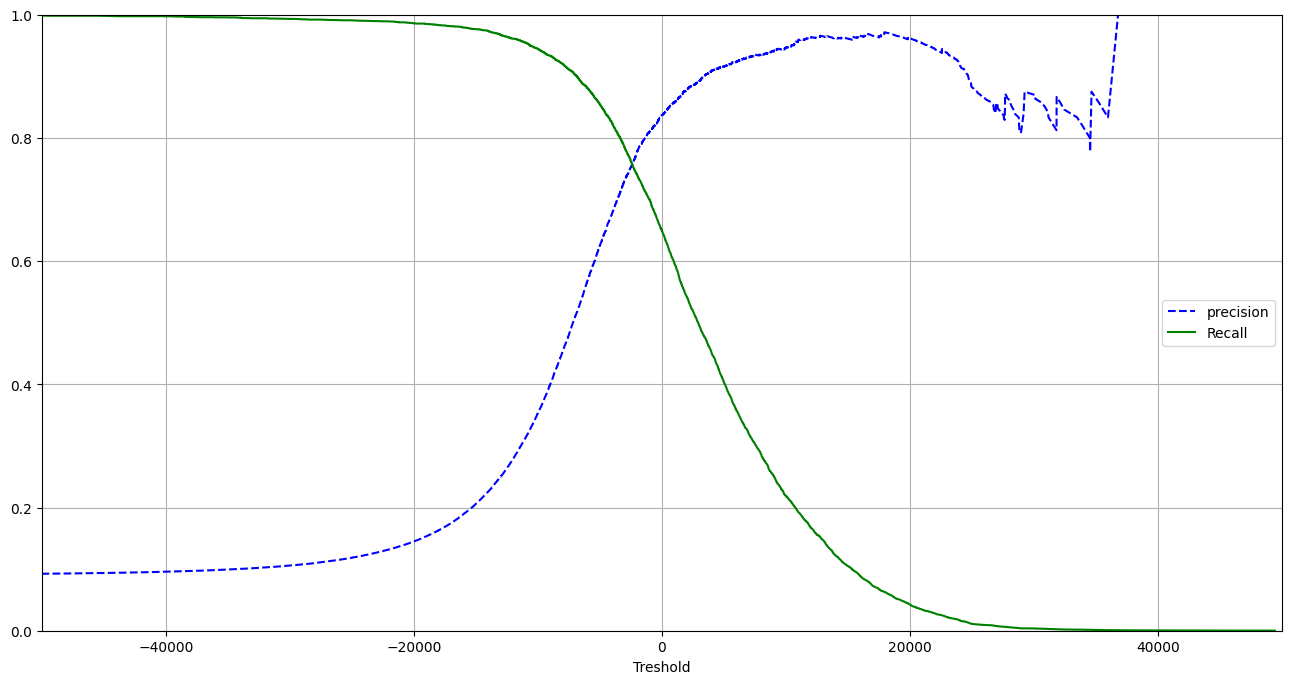

In [ ]:
plt.figure(figsize = (16, 8))
plt.plot(tresholds, precisions[:-1], 'b--', label = "precision")
plt.plot(tresholds, recalls[:-1], 'g-', label = 'Recall')

plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel('Treshold')
plt.legend(loc = 'center right')

In [ ]:
idx_for_90_precision = (precisions > 90).argmax()
treshold_for_90_precision = tresholds[idx_for_90_precision]
treshold_for_90_precision

-146348.56726173862

In [ ]:
idx_for_equal_precision = (precisions == recalls).argmax()
treshold_for_equals = tresholds[idx_for_equal_precision]
treshold_for_equals

-2379.064500932274

In [ ]:
precisions[idx_for_equal_precision], recalls[idx_for_equal_precision]

(0.7572403615569083, 0.7572403615569083)

In [ ]:
# ... previous code ...

idx_for_90_precision = (precisions >= 0.9).argmax() # precisions values are between 0 and 1
treshold_for_90_precision = tresholds[idx_for_90_precision]

# Generate predictions using the threshold for 90% precision
y_train_pred_90 = (y_scores >= treshold_for_90_precision)

precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [ ]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [ ]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.4799852425751706

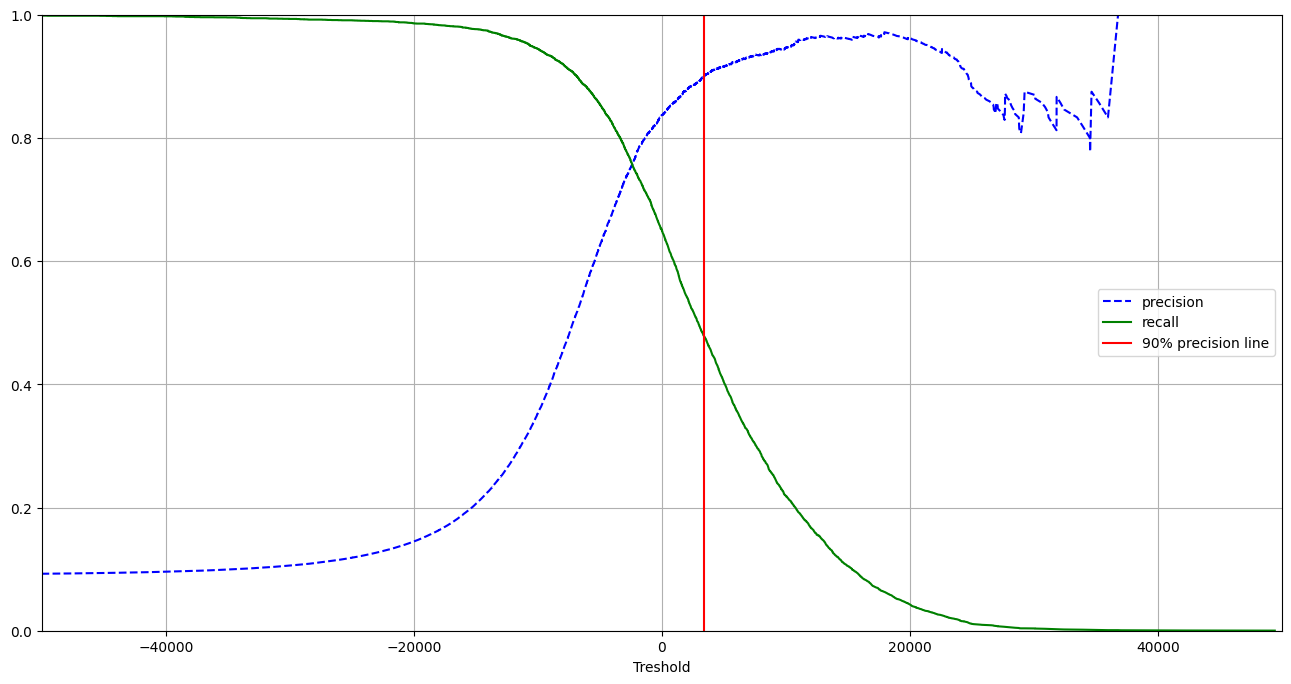

In [ ]:
plt.figure(figsize= (16, 8))
plt.plot(tresholds, precisions[:-1], 'b--', label = "precision")
plt.plot(tresholds, recalls[:-1], 'g-', label = "recall")

plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel('Treshold')
plt.axvline(x = treshold_for_90_precision, ymin = 0, ymax = 1, color = 'r', label = '90% precision line')
plt.legend(loc = 'center right')

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, treshold = roc_curve(y_train_5, y_scores)

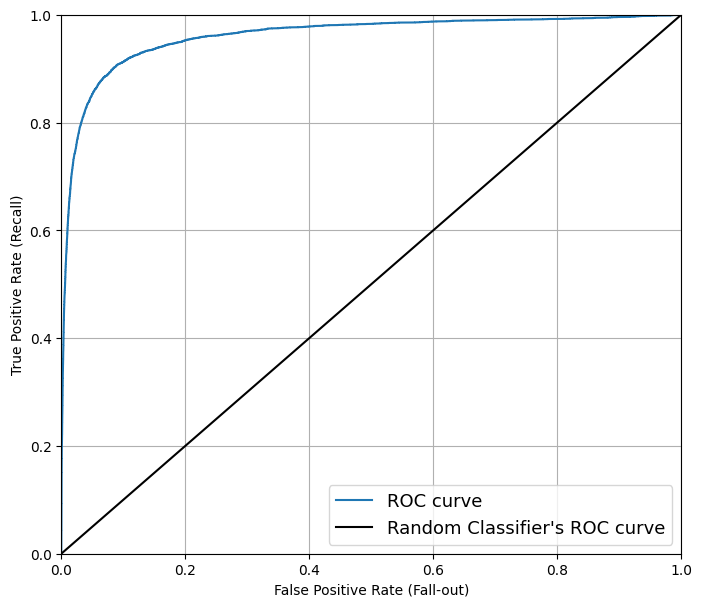

In [ ]:
plt.figure(figsize=(8,7))
plt.plot(fpr, tpr, label = 'ROC curve')
plt.plot([0,1], [0,1], 'k', label = "Random Classifier's ROC curve")
plt.xlabel('False Positive Rate (Fall-out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc = 'lower right', fontsize = 13)

In [ ]:
pd.value_counts(y)

<ipython-input-48-0e04e23f3b37>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(y)


,count
1,7877
7,7293
3,7141
2,6990
9,6958
0,6903
6,6876
8,6825
4,6824
5,6313


In [ ]:
from sklearn.metrics import roc_auc_score  #auc = area_under_curve

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [ ]:
y_probas_forest = cross_val_predict(forest_clf,
                                    X_train,
                                    y_train_5,
                                    cv = 3,
                                    method = 'predict_proba')  #predictin probabilitysini qaytarir, faiz gosterir.


In [ ]:
y_probas_forest[:2]  # => ilk 2 texmini gosterir.

array([[0.11, 0.89],
       [0.99, 0.01]])

In [ ]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, tresholds_forest = precision_recall_curve(
    y_train_5, y_scores_forest
)

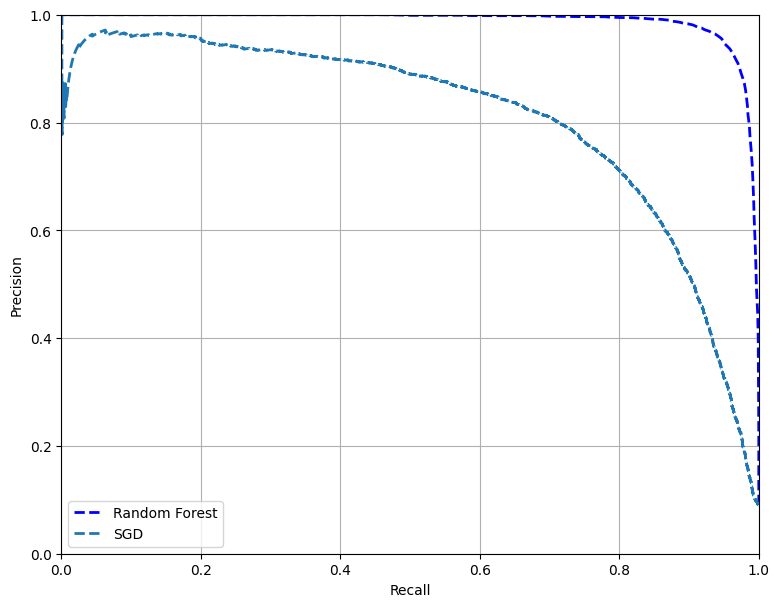

In [ ]:
plt.figure(figsize= (9, 7))
plt.plot(recalls_forest, precisions_forest, 'b--', linewidth=2,
         label= 'Random Forest')
plt.plot(recalls, precisions, '--', linewidth=2, label='SGD')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.axis([0,1,0,1])
plt.grid()
plt.legend(loc = 'lower left')

In [ ]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

In [ ]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [ ]:
recall_score(y_train_5, y_train_pred_forest)

0.8725327430363402

### **MultiClass Classification**

In [ ]:
# OvA or OvR -> One versus all or One versus rest; en yaxsi skoru goturur
# OvO ->  One versus one -- hamisini bir biri ile muqayise edir ve her biri ucun bir binary classification duzeldir, N × (N – 1) / 2 e beraberdir. N= class

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [ ]:
svm_clf.predict([some_digit])

array([5])

In [ ]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [ ]:
class_id = some_digit_scores.argmax()
class_id

5

In [ ]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
svm_clf.classes_[class_id]

5

In [ ]:
svm_clf.decision_function_shape = 'ovo'
some_digit_scores_ovo = svm_clf.decision_function([some_digit])
some_digit_scores_ovo.round(2)

array([[ 0.11, -0.21, -0.97,  0.51, -1.01,  0.19,  0.09, -0.31, -0.04,
        -0.45, -1.28,  0.25, -1.01, -0.13, -0.32, -0.9 , -0.36, -0.93,
         0.79, -1.  ,  0.45,  0.24, -0.24,  0.25,  1.54, -0.77,  1.11,
         1.13,  1.04,  1.2 , -1.42, -0.53, -0.45, -0.99, -0.95,  1.21,
         1.  ,  1.  ,  1.08, -0.02, -0.67, -0.14, -0.3 , -0.13,  0.25]])

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [ ]:
ovr_clf.predict([some_digit])

array([5])

In [ ]:
len(ovr_clf.estimators_)

10

In [ ]:
sgd_clf = SGDClassifier(random_state= 42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3])

In [ ]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring= 'accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype('float64'))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring = 'accuracy')

array([0.8983, 0.891 , 0.9018])

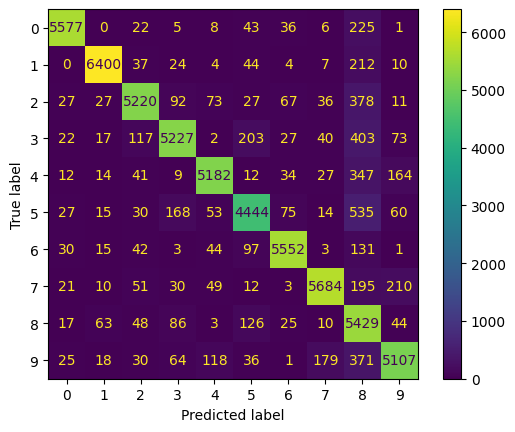

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

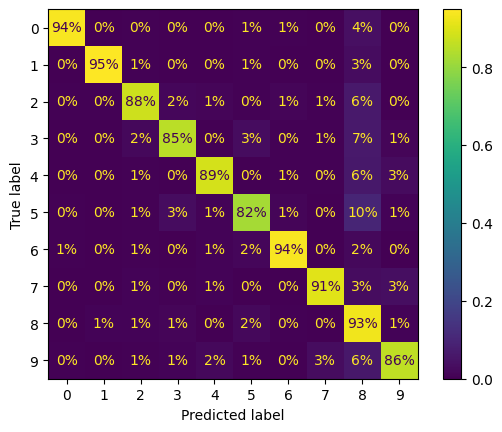

In [ ]:
plt.rc('font', size = 10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        normalize= 'true', values_format= '.0%')
plt.show()

## **Multilabel Classification**

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train.astype('int8') % 2 == 1)  #iki label yaratdiq biri 7den boyukdur ya yox, ikincisi tekdir yoxsa yox
y_multilabel = np.c_[y_train_large, y_train_odd]   #np.c_ ---> bu labelleri birlesdirdik

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv= 3)
f1_score(y_multilabel, y_train_knn_pred, average= 'macro')  #makro onu deyir ki, hamisi ucun f1 scoru tapir, sonra saya baxmadan birlesdirir.

0.9764102655606048

In [ ]:
y_train_knn_pred

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]])

## **MultiOutput Classification**

In [ ]:
import random
np.random.seed(42)
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

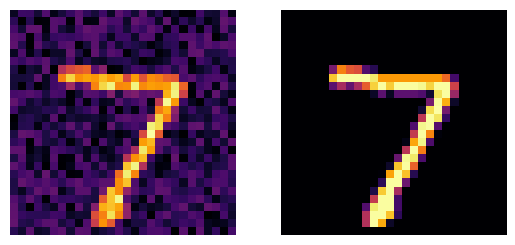

In [ ]:
plt.subplot(121);
digit_image(X_test_mod[0])
plt.subplot(122);
digit_image(y_test_mod[0])
plt.show()

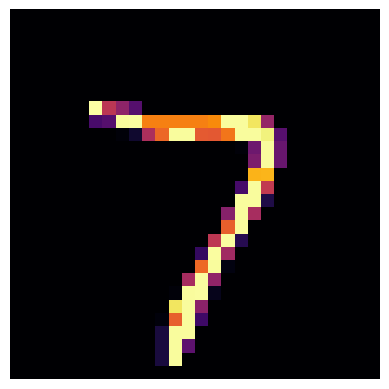

In [ ]:
knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train_mod, y_train_mod)
cleaned_pic = knn_clf.predict([X_test_mod[0]])

digit_image(cleaned_pic)

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
baseline_accuracy = knn_clf.score(X_test, y_test)
baseline_accuracy

0.9688